# Interpolación con Splines Lineales
Cuando se tiene un gran número de puntos, un único polinomio de alto grado puede presentar oscilaciones no deseadas (fenómeno de Runge). Una alternativa es aplicar polinomios de bajo grado a subconjuntos de los datos. Estos polinomios se conectan entre sí para formar una función continua. A estas funciones por tramos se les llama **splines**.
 
El **spline lineal** es el más simple de todos. Consiste en conectar los puntos de datos consecutivos mediante líneas rectas. El resultado es una función continua, pero sus derivadas no son continuas en los puntos de datos (los "nudos"), lo que resulta en "esquinas" afiladas.


## Ejemplo 1: Interpolación de $\ln(x)$
 
**Problema:**

Dados los siguientes puntos de la función $y = \ln(x)$, usar splines lineales para estimar el valor de $\ln(2)$.

Puntos: $(1, \ln(1)), (4, \ln(4)), (5, \ln(5)), (6, \ln(6))$

In [1]:
from mnspy import SplineLineal
import numpy as np

In [2]:
# Primero, definimos los vectores `x` e `y` con los puntos de datos.
# Para los splines, los puntos deben estar ordenados por `x`.
x = np.array([1., 4., 5, 6.])
y = np.log(x)

In [3]:
# A continuación, creamos una instancia de la clase `SplineLineal`, pasándole los puntos de datos.
inter = SplineLineal(x, y)
# Ahora, usamos el método `evaluar()` para interpolar el valor de `y` en `x=2`.
# El método encontrará el intervalo que contiene a 2 (en este caso, [1, 4]) y usará la línea recta que conecta esos dos puntos.
print(f"El valor interpolado en x=2 es: {inter.evaluar(2)}")

El valor interpolado en x=2 es: 0.46209812037329684


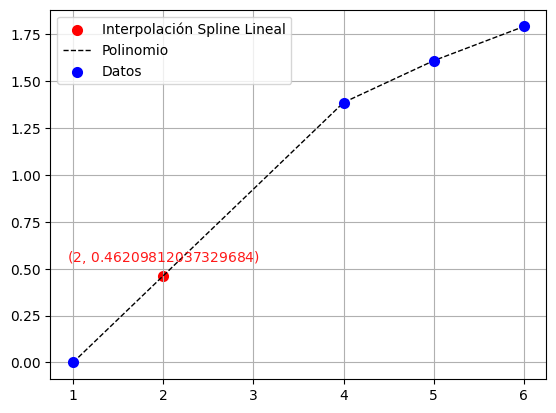

In [4]:
# Podemos visualizar el resultado. La gráfica muestra los puntos originales conectados por líneas rectas y el punto interpolado (en rojo).
inter.graficar(2)

In [5]:
# El método `obtener_polinomio()` nos muestra la ecuación de la línea recta específica que se usó para la interpolación en el último punto evaluado.
inter.obtener_polinomio()

<IPython.core.display.Math object>

___
## Ejemplo 2: Datos de Propiedades del Aire

**Problema:**

A partir de la siguiente tabla de propiedades del aire, usar splines lineales para estimar la densidad a una temperatura de $350^\circ C$.
 

In [6]:
# Definimos los datos de Temperatura (T) y Densidad (rho).
T = np.array([-40., 0., 20., 50., 100, 150, 200, 250, 300, 400, 500])
rho = np.array([1.52, 1.29, 1.2, 1.09, 0.95, 0.84, 0.75, 0.68, 0.62, 0.53, 0.46])

In [7]:
# Creamos el objeto SplineLineal con los datos de temperatura y densidad.
sc = SplineLineal(T, rho)

In [8]:
# Evaluamos la densidad a T = 350°C.
densidad_350 = sc.evaluar(350)
print(f"La densidad interpolada a 350°C es: {densidad_350:.4f} kg/m³")

La densidad interpolada a 350°C es: 0.5750 kg/m³


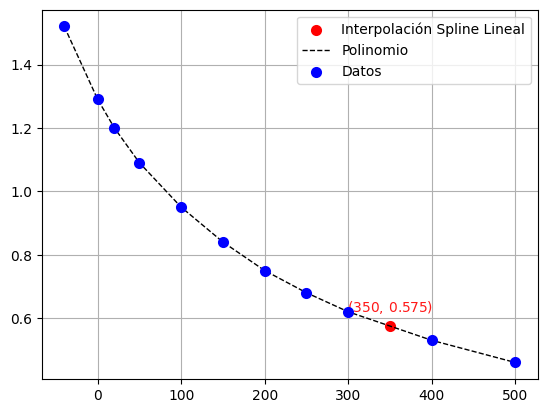

In [9]:
# Graficamos los datos y la interpolación.
sc.graficar(350)

In [10]:
# Obtenemos la ecuación de la recta para cada intervalo.
sc.obtener_polinomio()

<IPython.core.display.Math object>